# Data Analysis on IPL Dataset

In [142]:
import numpy as np
import pandas as pd

In [143]:
matches_df = pd.read_csv(r"C:\Users\archana\Downloads\matches.csv")

In [144]:
deliveries_df = pd.read_csv(r"C:\Users\archana\Downloads\deliveries.csv")

## Understanding the dataset

In [145]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [146]:
matches_df.shape

(756, 18)

Here- id: A unique identifier for each match.

season: The year or season in which the match took place (e.g., 2017, 2018, etc.).

city: The city where the match was played.

date: The date on which the match took place.

team1: The first team participating in the match.

team2: The second team participating in the match.

toss_winner: The team that won the toss.

toss_decision: The decision made by the toss-winning team, whether to bat or field.

result: The result of the match (e.g., normal, tie, no result).

dl_applied: Whether the Duckworth-Lewis method was applied (1 if applied, 0 if not).

winner: The team that won the match.

win_by_runs: The margin of victory in terms of runs (positive if the team batting first wins).

win_by_wickets: The margin of victory in terms of wickets (positive if the team bowling second wins).

player_of_match: The player who was awarded the "Man of the Match."

venue: The venue or stadium where the match was played.

umpire1: The first on-field umpire.

umpire2: The second on-field umpire.

umpire3: A third umpire, if applicable.

In [147]:
matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [148]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [149]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [150]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [151]:
deliveries_df.shape

(179078, 21)

In [152]:
deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [153]:
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

match_id: A unique identifier for each match. This column is likely used to link the information in this DataFrame to another DataFrame that contains match-level details.

inning: The inning number (1st or 2nd). It indicates whether the record corresponds to the first or second inning of the match.

batting_team: The team that is currently batting during the specific delivery.

bowling_team: The team that is currently bowling during the specific delivery.

over: The over number in the match. An over consists of six balls, and this column indicates the current over during the match.

ball: The ball number within the over. It ranges from 1 to 6, representing the specific ball being bowled in the current over.

batsman: The batsman facing the delivery.

non_striker: The batsman at the non-striker's end (the end opposite to the bowler).

bowler: The player who is bowling the current delivery.

is_super_over: Indicates whether the delivery is part of a super over (1 if true, 0 if false). A super over is a tie-breaking method used in limited-overs cricket.

wide_runs: The number of runs scored as wides by the batting team on the specific delivery.

bye_runs: The number of runs scored as byes by the batting team on the specific delivery.

legbye_runs: The number of runs scored as leg-byes by the batting team on the specific delivery.

noball_runs: The number of runs scored as no-balls by the batting team on the specific delivery.

penalty_runs: The number of runs scored as penalty runs on the specific delivery.

batsman_runs: The number of runs scored by the batsman on the specific delivery.

extra_runs: The total number of extra runs scored on the specific delivery (sum of wide_runs, bye_runs, legbye_runs, noball_runs, and penalty_runs).

total_runs: The total runs scored on the specific delivery (sum of batsman_runs and extra_runs).

player_dismissed: The batsman who got dismissed on the specific delivery (if any).

dismissal_kind: The type of dismissal if the batsman got out on the specific delivery (e.g., 'bowled', 'caught', 'run out', etc.).

fielder: The player responsible for fielding and involved in the dismissal (if applicable).

In [154]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [155]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


### Merging  2 dataframes

In [156]:
ipl_df = pd.merge(deliveries_df, matches_df, left_on='match_id', right_on='id', how='outer')

In [157]:
ipl_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


### Converting into a csv file

In [158]:
ipl_df.to_csv('ipl_df.csv', index=False)

In [177]:
ipl_df = pd.read_csv('ipl_df.csv')

C:\Users\archana\AppData\Local\Temp\ipykernel_29976\2895915429.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  ipl_df = pd.read_csv('ipl_df.csv')


In [178]:
ipl_df.shape

(179078, 39)

In [179]:
ipl_df['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

## Data preprocessing

In [180]:
ipl_df.duplicated().sum()

23

In [181]:
ipl_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
id                       0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
u

#### Since some columns have more null values nearly equal to no of rows...we will drop the columns

In [182]:
ipl_df = ipl_df.drop('umpire3', axis=1)

#### Filling null values in 'city' column

In [183]:
ipl_df['player_dismissed'].fillna(ipl_df['city'].mode()[0], inplace=True)

In [184]:
ipl_df['dismissal_kind'].fillna(ipl_df['city'].mode()[0], inplace=True)

In [185]:
ipl_df['fielder'].fillna(ipl_df['city'].mode()[0], inplace=True)

In [186]:
ipl_df['city'].fillna(ipl_df['city'].mode()[0], inplace=True)

In [187]:
ipl_df['winner']

0         Sunrisers Hyderabad
1         Sunrisers Hyderabad
2         Sunrisers Hyderabad
3         Sunrisers Hyderabad
4         Sunrisers Hyderabad
                 ...         
179073         Mumbai Indians
179074         Mumbai Indians
179075         Mumbai Indians
179076         Mumbai Indians
179077         Mumbai Indians
Name: winner, Length: 179078, dtype: object

In [188]:
ipl_df['winner'] = ipl_df.groupby('batting_team')['winner'].transform(lambda x: x.fillna(x.mode()[0]))

In [189]:
ipl_df['player_of_match'] = ipl_df.groupby('winner')['player_of_match'].transform(lambda x: x.fillna(x.mode()[0]))

In [190]:
ipl_df['umpire1'] = ipl_df.groupby('winner')['umpire1'].transform(lambda x: x.fillna(x.mode().iat[0]))


In [191]:
ipl_df['umpire2'] = ipl_df.groupby('winner')['umpire1'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

In [192]:
ipl_df.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
id                  0
season              0
city                0
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
dl_applied          0
winner              0
win_by_runs         0
win_by_wickets      0
player_of_match     0
venue               0
umpire1             0
umpire2             0
dtype: int64

In [193]:
ipl_df.duplicated().sum()

23

In [194]:
ipl_df.drop_duplicates()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,AY Dandekar
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,AY Dandekar
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,AY Dandekar
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,AY Dandekar
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,AY Dandekar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Nitin Menon
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Nitin Menon
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Nitin Menon
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Nitin Menon


In [195]:
ipl_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2'],
      dtype='object')

# Exploratory Data Analysis

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

### Distribution of total runs

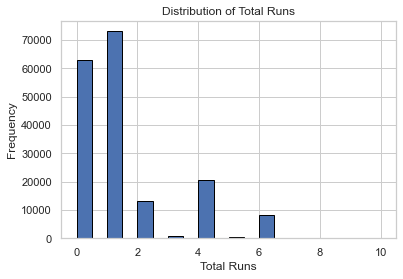

In [197]:
plt.hist(ipl_df['total_runs'], bins=20, edgecolor='black')
plt.title('Distribution of Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()

Observation:
Most of the batters took 1 run for a ball followed by 0,4,2 and 6 runs

### Distribution of Win by Runs

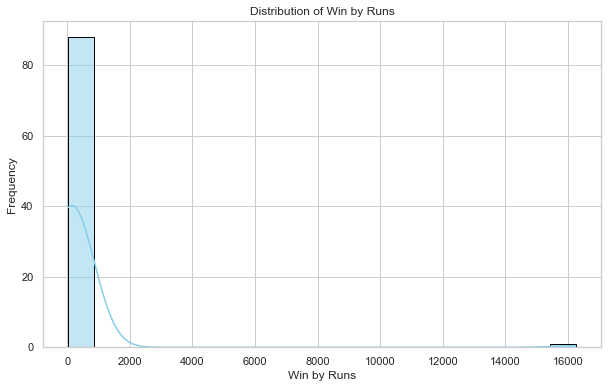

In [198]:
plt.figure(figsize=(10, 6))
sns.histplot(ipl_df.groupby('win_by_runs').size() // 6, bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Win by Runs')
plt.xlabel('Win by Runs')
plt.ylabel('Frequency')
plt.show()

## Distribution of Super Overs

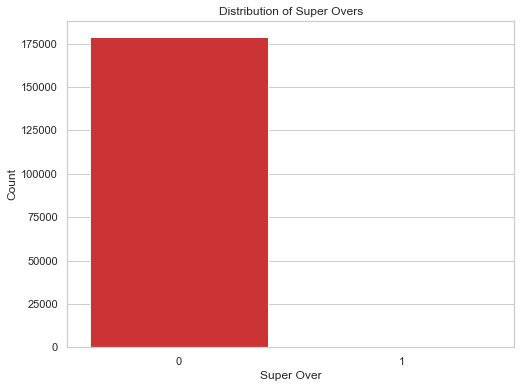

In [199]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_super_over', data=ipl_df, palette='Set1')
plt.title('Distribution of Super Overs')
plt.xlabel('Super Over')
plt.ylabel('Count')
plt.show()

## Countplot for toss_decision

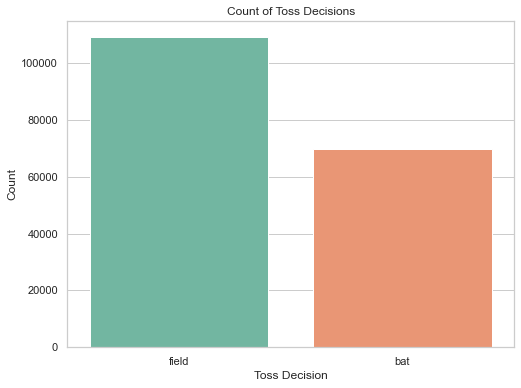

In [200]:
plt.figure(figsize=(8, 6))
sns.countplot(x='toss_decision', data=ipl_df, palette='Set2')
plt.title('Count of Toss Decisions')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.show()

## Percentage of getting bat or feild

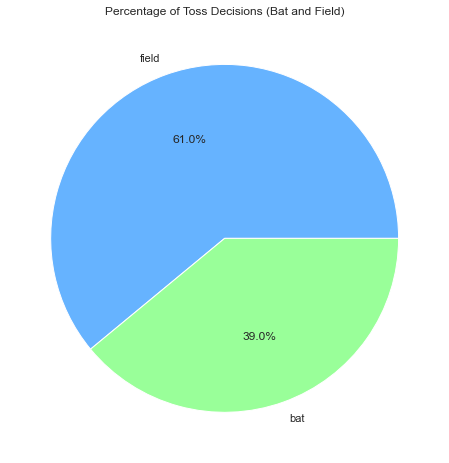

In [201]:
toss_decision_counts = ipl_df['toss_decision'].value_counts()
labels = toss_decision_counts.index
sizes = toss_decision_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'])
plt.title('Percentage of Toss Decisions (Bat and Field)')
plt.show()

## Number of Matches Won Based on Toss Decision

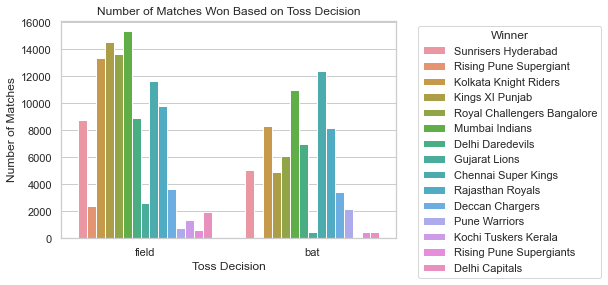

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'toss_decision' and 'winner' are columns in your DataFrame
sns.countplot(x='toss_decision', hue='winner', data=ipl_df)
plt.title('Number of Matches Won Based on Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.legend(title='Winner', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Top 10 best  batsmen

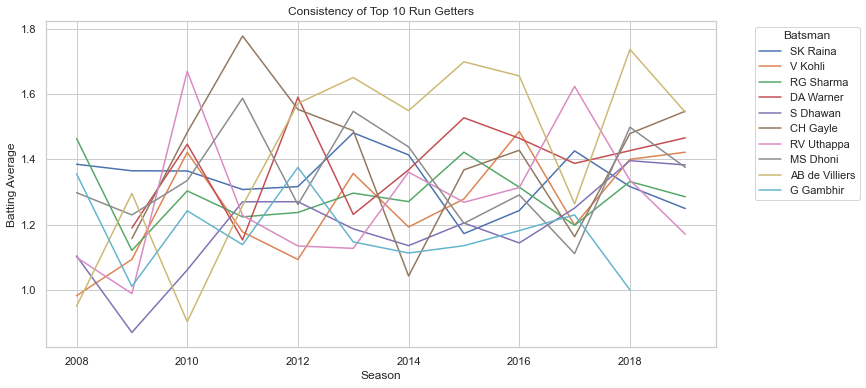

In [203]:
top_10_batsmen = ipl_df.groupby('batsman')['total_runs'].sum().nlargest(10).index

plt.figure(figsize=(12, 6))
for batsman in top_10_batsmen:
    batsman_data = ipl_df[ipl_df['batsman'] == batsman]
    batting_average = batsman_data.groupby('season')['batsman_runs'].mean()
    plt.plot(batting_average, label=batsman)

plt.title('Consistency of Top 10 Run Getters')
plt.xlabel('Season')
plt.ylabel('Batting Average')
plt.legend(title='Batsman', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Number of wickets taken by each bowler

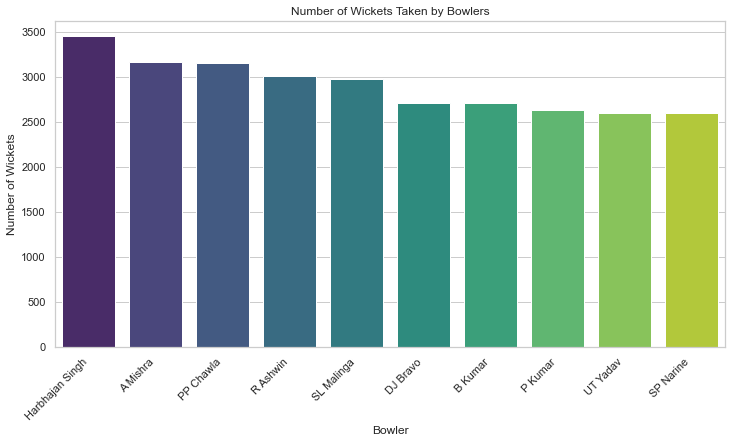

In [204]:
wickets_by_bowler = ipl_df[ipl_df['dismissal_kind'].notnull()].groupby('bowler')['dismissal_kind'].count().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=wickets_by_bowler.index, y=wickets_by_bowler.values, palette='viridis')
plt.title('Number of Wickets Taken by Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

## Top batsmen with highest Strikerate

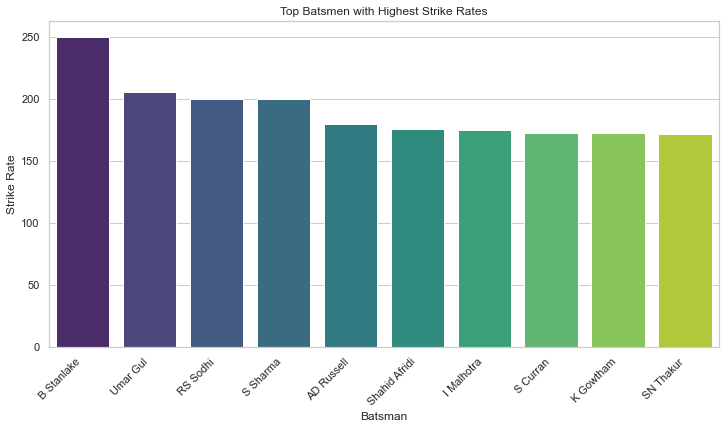

In [205]:
batsman_strike_rate = ipl_df.groupby('batsman').agg({'batsman_runs': 'sum', 'ball': 'count'})
batsman_strike_rate['strike_rate'] = (batsman_strike_rate['batsman_runs'] / batsman_strike_rate['ball']) * 100

# Select the top batsmen with the highest strike rates
top_batsmen = batsman_strike_rate.nlargest(10, 'strike_rate')

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=top_batsmen.index, y=top_batsmen['strike_rate'], palette='viridis')
plt.title('Top Batsmen with Highest Strike Rates')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

## venue has hosted most number of IPL matches

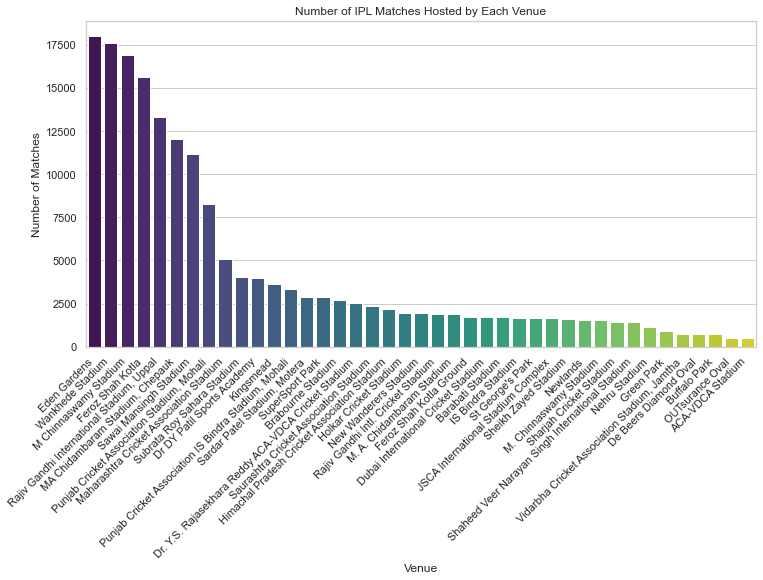

In [206]:

venue_counts = ipl_df['venue'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=venue_counts.index, y=venue_counts.values, palette='viridis')
plt.title('Number of IPL Matches Hosted by Each Venue')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

## Scatter Plot: Win by Runs vs. Win by Wickets

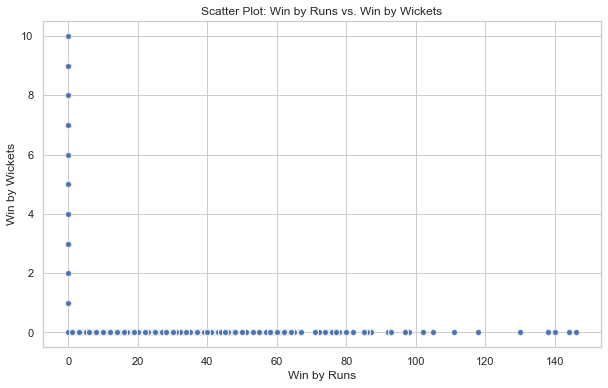

In [207]:
plt.figure(figsize=(10, 6))
plt.scatter(ipl_df['win_by_runs'], ipl_df['win_by_wickets'], alpha=0.5, edgecolors="w")
plt.title('Scatter Plot: Win by Runs vs. Win by Wickets')
plt.xlabel('Win by Runs')
plt.ylabel('Win by Wickets')
plt.grid(True)
plt.show()

## Heatmap

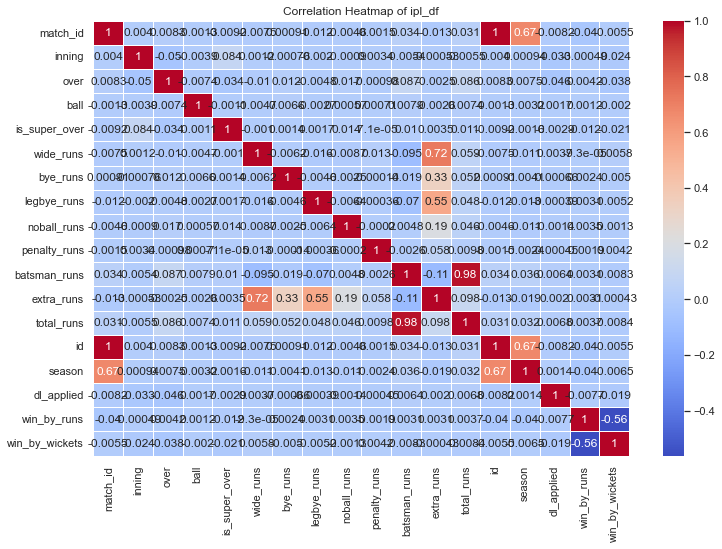

In [232]:
plt.figure(figsize=(12, 8))
sns.heatmap(ipl_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of ipl_df')
plt.show()

## Pairplot

In [ ]:
sns.pairplot(ipl_df)
plt.suptitle('Pair Plot of ipl_df', y=1.02)
plt.show()

# QUESTIONS/ SCENARIOS

## 3.City which hosted most number of seasons according to the data is:

In [209]:
most_hosted_city = ipl_df['city'].value_counts().idxmax()
print(f"The city that hosted the most number of seasons is: {most_hosted_city}")

The city that hosted the most number of seasons is: Mumbai


## 4.Which year has the most number of matches played?

In [210]:
most_matches_year = ipl_df['season'].value_counts().idxmax()
print(f"The year with the most number of matches played is: {most_matches_year}")

The year with the most number of matches played is: 2013


## 5. Maximum wins by Mumbai Indians in 2011 are


In [230]:
mumbai_wins_2011 = ipl_df[(ipl_df['winner'] == 'Mumbai Indians') & (ipl_df['season'] == 2011)]

max_wins_count = mumbai_wins_2011['winner'].value_counts().max()

max_wins_count 

2416

## 7.  What is the percentage of getting bat and field in feature 'toss_descision'?

In [212]:
percentage = ipl_df['toss_decision'].value_counts(normalize=True) * 100
percentage

field    60.9913
bat      39.0087
Name: toss_decision, dtype: float64

## 9. In which years where taking batting second have won more number of matches?

In [213]:
batting_2nd = ipl_df[ipl_df['toss_decision'] == 'field']['season'].value_counts().sort_index()

years_with_more_wins = batting_second_wins[batting_2nd == batting_second_wins.max()].index.tolist()
years_with_more_wins

[2019]

## 11. In 2019 which batsman scored highest number of runs by hitting 6's and 4's?

In [214]:
batsman_2019 = ipl_df[(ipl_df['season'] == 2019) & (ipl_df['batsman_runs'].isin([4, 6]))]

In [215]:
runs_by_6s_4s = batsman_2019.groupby('batsman')['batsman_runs'].sum().nlargest(1)
runs_by_6s_4s

batsman
AD Russell    438
Name: batsman_runs, dtype: int64

## 12. Most number of wickets taken by a bowler is

In [216]:

most_wickets_bowler = ipl_df[ipl_df['dismissal_kind'].notnull()].groupby('bowler')['dismissal_kind'].count().nlargest(1)

print("Bowler with the most number of wickets:", most_wickets_bowler.index[0])


Bowler with the most number of wickets: Harbhajan Singh


## 13.  What is the strike rate of Kohli in 2016

In [217]:
kohli_2016 = ipl_df[(ipl_df['batsman'] == 'V Kohli') & (ipl_df['season'] == 2016)]
total_runs = kohli_2016['batsman_runs'].sum()

In [218]:
total_balls_faced = kohli_2016.shape[0]
strike_rate = (total_runs / total_balls_faced) * 100
strike_rate

148.54961832061068

## 

## 14.Bowlers with maximum number of extras:

In [219]:
bowler_extras = ipl_df.groupby('bowler')['extra_runs'].sum()

max_extras_bowler = bowler_extras.idxmax()

In [220]:
max_extras_bowler

'SL Malinga'

## 15. Which venue has hosted most number of IPL matches? 

In [221]:
venue = ipl_df['venue'].value_counts()
most_matches_venue = venue.idxmax()
most_matches_venue

'Eden Gardens'

## 16. In 2017 when sunrisers hyderabad clashed against Royal Challengers Bangalore which team player won player of the match?

In [222]:
match_2017_srh_rcb = ipl_df[(ipl_df['season'] == 2017) & (ipl_df['team1'].isin(['Sunrisers Hyderabad', 'Royal Challengers Bangalore'])) & (ipl_df['team2'].isin(['Sunrisers Hyderabad', 'Royal Challengers Bangalore']))]

In [223]:
player_of_match = match_2017_srh_rcb.loc[match_2017_srh_rcb['player_of_match'].notnull(), 'player_of_match'].values[0]

In [224]:
player_of_match

'Yuvraj Singh'

## 17.Across seasons who are the top three batsman's with most number of run out?

In [225]:
run_outs = ipl_df[ipl_df['dismissal_kind'] == 'run out']
run_out_counts = run_outs.groupby('batsman')['dismissal_kind'].count()

# Get the top three batsmen with the most run-outs
top_three_run_outs = run_out_counts.nlargest(3)
top_three_run_outs

batsman
MS Dhoni      21
RG Sharma     17
KD Karthik    16
Name: dismissal_kind, dtype: int64

## 18.What are the total runs scored by V Kohli when the bowler was JJ Burmah?

In [226]:
filtered_df = ipl_df[(ipl_df['batsman'] == 'V Kohli') & (ipl_df['bowler'] == 'JJ Bumrah')]
total_runs_by_kohli = filtered_df['batsman_runs'].sum()
total_runs_by_kohli

112

## 19. Across all seasons which player was dismissed the maximum number of times via caught and bowled

In [228]:
caught_and_bowled_df = ipl_df[ipl_df['dismissal_kind'] == 'caught and bowled']
max_dismissals_player = caught_and_bowled_df['player_dismissed'].value_counts().idxmax()
max_dismissals_count = caught_and_bowled_df['player_dismissed'].value_counts().max()

print(f"Player dismissed the maximum number of times via caught and bowled: {max_dismissals_player}")
print(f"Number of dismissals via caught and bowled: {max_dismissals_count}")

Player dismissed the maximum number of times via caught and bowled: SK Raina
Number of dismissals via caught and bowled: 7


## 20. which player has the highest hard-hitting ability?

#### lets assume hard hitting with no of sixes scored

In [229]:
sixes_df = ipl_df[ipl_df['batsman_runs'] == 6]
sixes_count = sixes_df.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)
highest_sixes_player = sixes_count.idxmax()
highest_sixes_player

'CH Gayle'